# Travel Insurance

## Introduction

In this project we will explore a Travel Insurance Dataset which includes an information about almost 2,000 customers. In this notebook we will explore the data and try to do predictive modelling using different machine learning algorithms.

## Imports and Looking into the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, zscore
from statsmodels.stats.weightstats import ztest
from scipy.stats import t


In [2]:
df = pd.read_csv('./TravelInsurancePrediction.csv')
df

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...
1982,1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


Let's drop the unwanted "Unnamed: 0" column

In [3]:
df = df.drop(columns=['Unnamed: 0'])
df

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


In [4]:
df.isnull().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

Our dataset looks clean 🧼

In [5]:
df.duplicated().sum()

738

We have duplicates in our dataset, but let's keep them. Because they might be an outcome of two people having the same attributes.

## Exploratory Data Analysis (EDA)

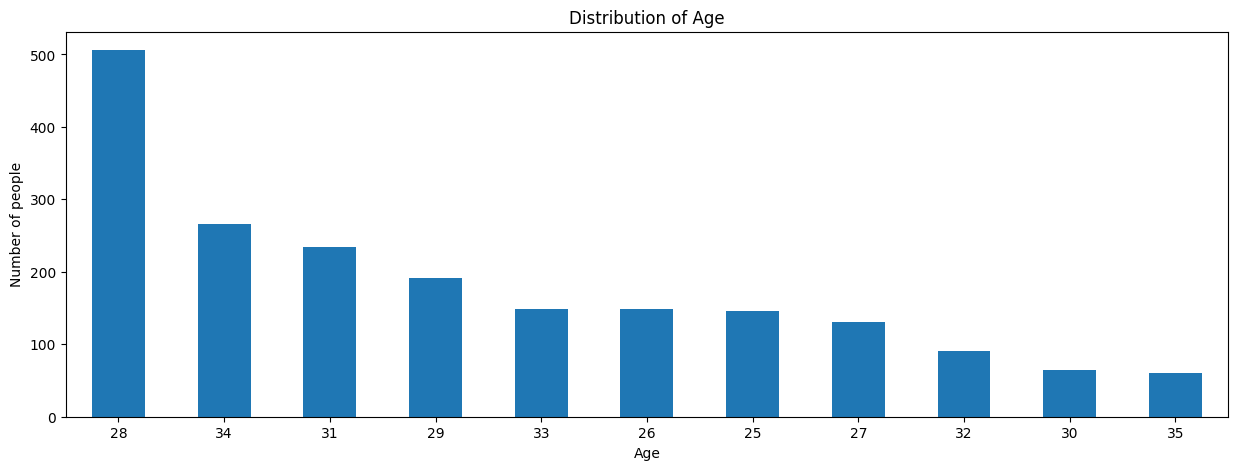

In [6]:
df['Age'].value_counts().plot(kind='bar', figsize=(15, 5))
plt.title('Distribution of Age')
plt.ylabel('Number of people')
plt.xticks(rotation=0)
plt.show()

There are many people of age 28 in our dataset.

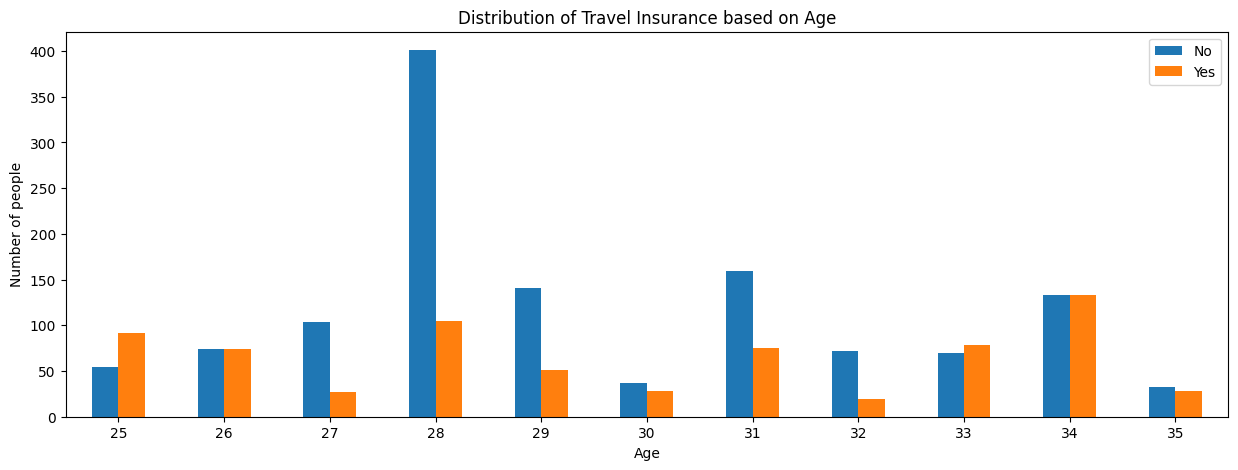

In [7]:
df.groupby('Age')['TravelInsurance'].value_counts().unstack().plot(kind='bar', figsize=(15, 5))
plt.title('Distribution of Travel Insurance based on Age')
plt.ylabel('Number of people')
plt.xlabel('Age')
plt.legend(['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

- As age increases we can not really see people either buying or not buying the insurance.
- People of age 28 even though they are majority of the people in this dataset most of them won't purchase the insurance.

In [8]:
def pie_plot(column_name, title, legend = None):
    df[column_name].value_counts().plot(kind='pie', figsize=(10, 6), autopct='%1.1f%%', startangle=90, shadow=True, explode=[0.1, 0.1])
    plt.title('Distribution of ' + title)
    if legend != None: plt.legend(legend)
    plt.axis('equal')
    plt.show()

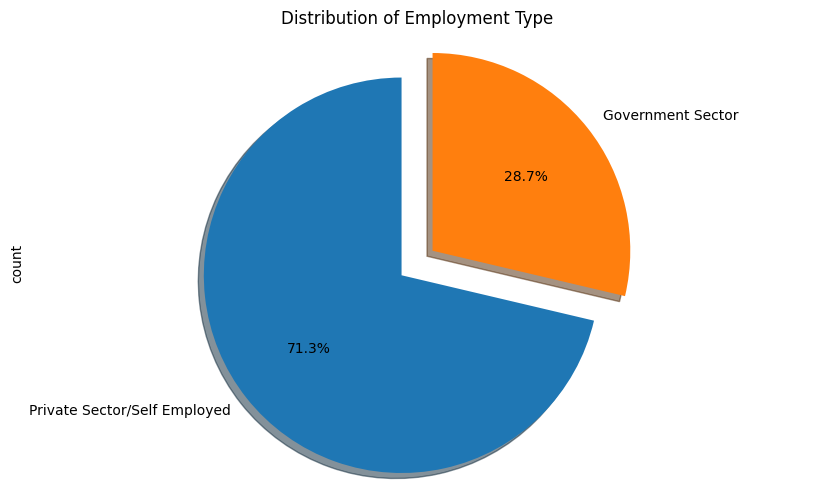

In [9]:
pie_plot('Employment Type', 'Employment Type')

There are more people who work in the private sector as compared to the government sector in our dataset.

In [10]:
def bar_plot_with_percenatge_diff(column_name, title, binary_features=None):
    '''
    Recives Column name, title, y_label, and an optional binary features and plots a bar chart with a percentage difference on top of each.
    '''
    df.groupby(column_name)['TravelInsurance'].value_counts().unstack().plot(kind='bar', figsize=(15, 5))
    plt.title('Distribution of Travel Insurance based on ' + title)
    plt.ylabel('Number of People')
    plt.xlabel(column_name)
    for index, value in enumerate(df.groupby(column_name)['TravelInsurance'].value_counts().unstack().values):
        plt.text(index-0.1, value[0]+1, str(round((value[0]-value[1])/value[0]*100, 2))+'%')
    plt.legend(['No', 'Yes'])
    plt.xticks([0, 1], binary_features, rotation=0)
    plt.show()

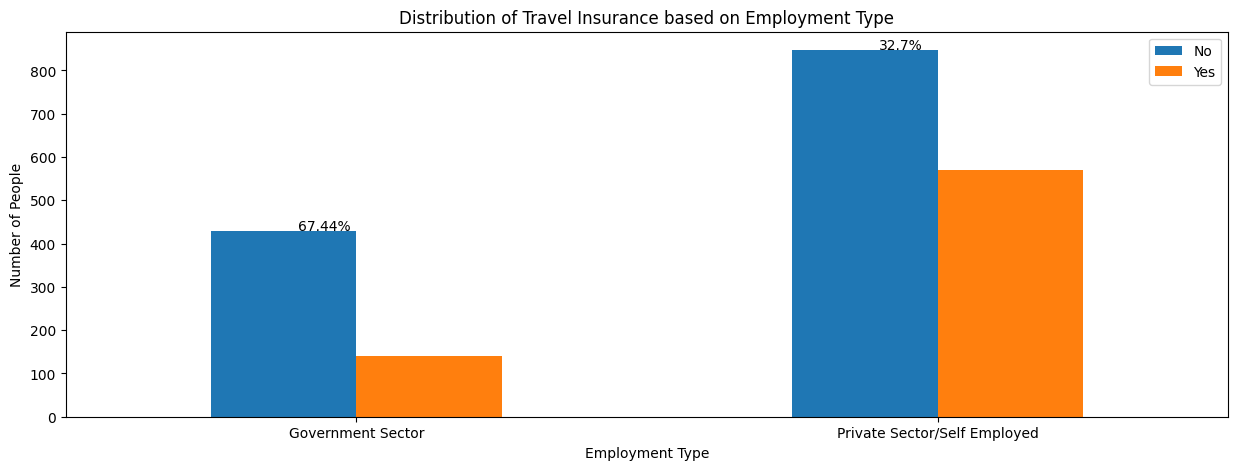

In [11]:
bar_plot_with_percenatge_diff('Employment Type', 'Employment Type', ['Government Sector', 'Private Sector/Self Employed'])

**Note**: The percentages at the top of each bar represent the percentage difference between those who say yes and those who say no to buying the insurance. The need for using the percentage difference is because the dataset is mostly imbalanced for most of the features. This might lead us to wrong conclusions specially when we try to compare buying an insurance with each feature. 

For example if we look at the above plot we can clearly see there are many people in the private sector as comapred to the government sector, so it is obvious that we would get more people who will say yes to buying an insurance in the private sector, but in reality that might not be the case, but by looking at the percenatge difference we can clearly see the difference for each individual feature which enables us to reach to a better conclusion.

Looking at the above plot we can say more people in the private sector will buy an insurance, because the percentage difference is smaller than that of those in the government sector.

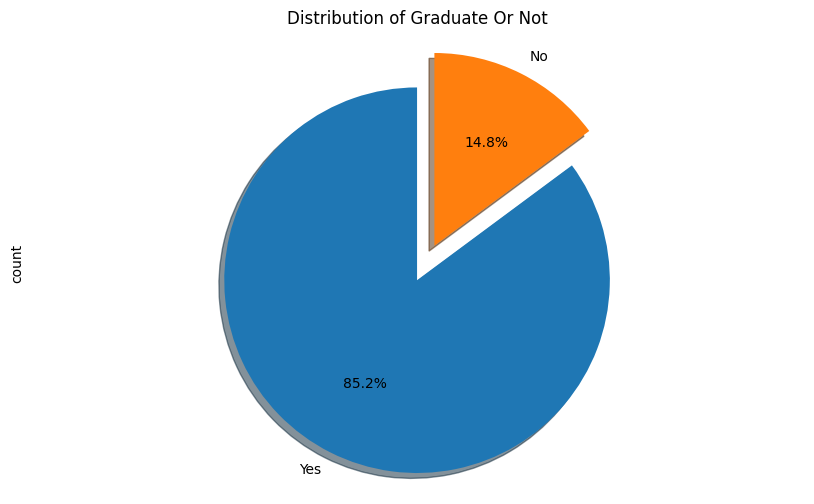

In [12]:
pie_plot('GraduateOrNot', 'Graduate Or Not')

More people are graduated in this dataset.

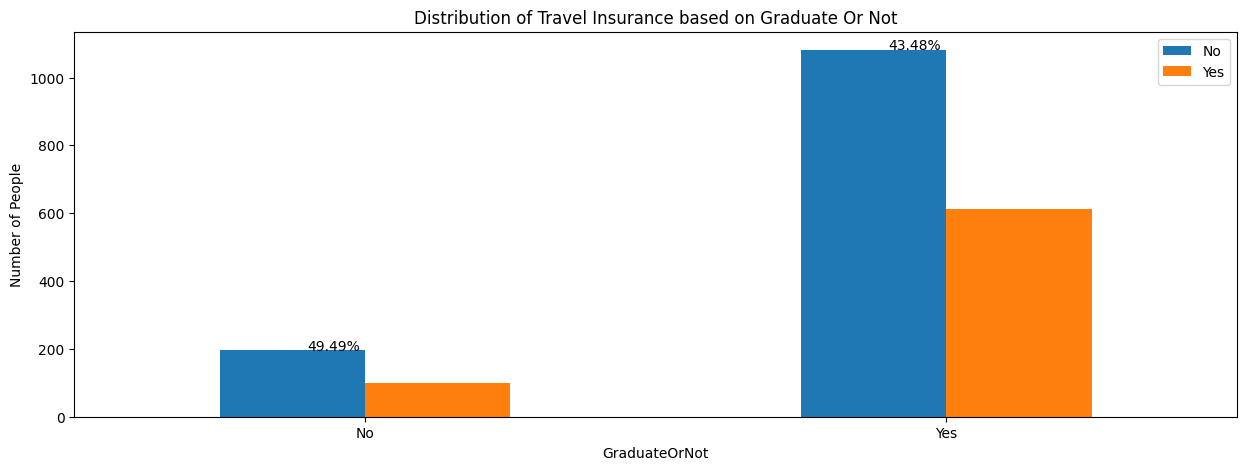

In [13]:
bar_plot_with_percenatge_diff('GraduateOrNot', 'Graduate Or Not', ['No', 'Yes'])

Looking at the percentage difference we can now see that graduated people tend to buy insurances, but they don't show such a significant diffrence from that of who haven't graduated.

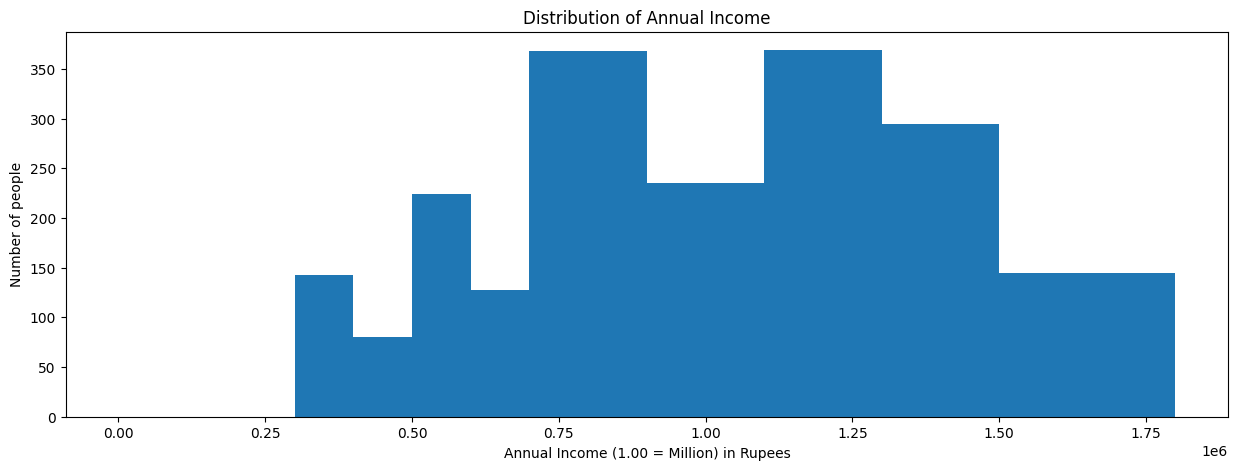

In [14]:
df['AnnualIncome'].plot(kind='hist', figsize=(15, 5), bins=[0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 900000, 1100000, 1300000, 1500000, 1800000])
plt.title('Distribution of Annual Income')
plt.ylabel('Number of people')
plt.xlabel('Annual Income (1.00 = Million) in Rupees')
plt.show()

Most people in this datset have an annula income of between 750,000 - 1,500,000 Rupees.

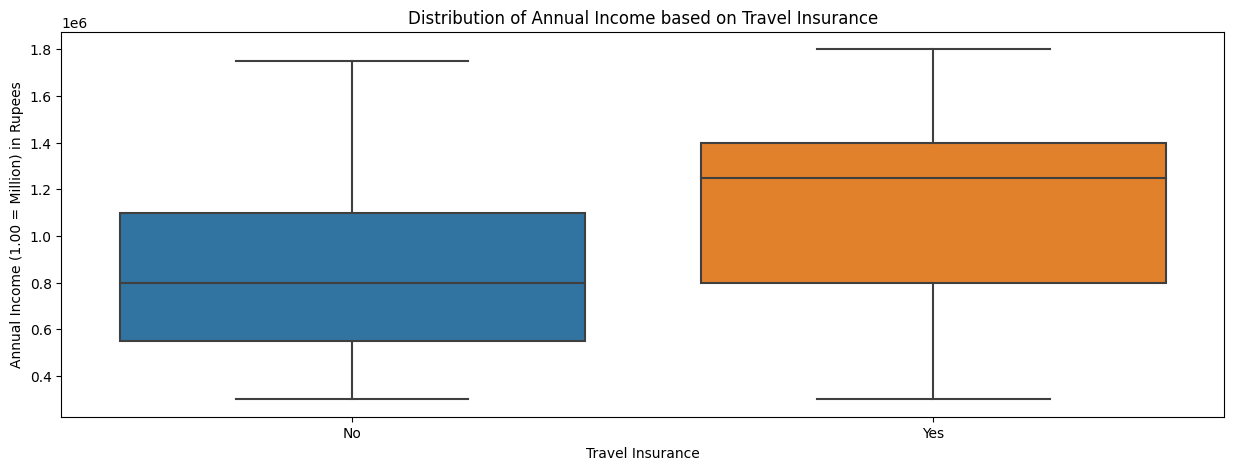

In [15]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='TravelInsurance', y='AnnualIncome', data=df)
plt.title('Distribution of Annual Income based on Travel Insurance')
plt.ylabel('Annual Income (1.00 = Million) in Rupees')
plt.xlabel('Travel Insurance')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.show()

From the plot we see that there are more No's in lower income ranges and more Yes's on higher ranges.

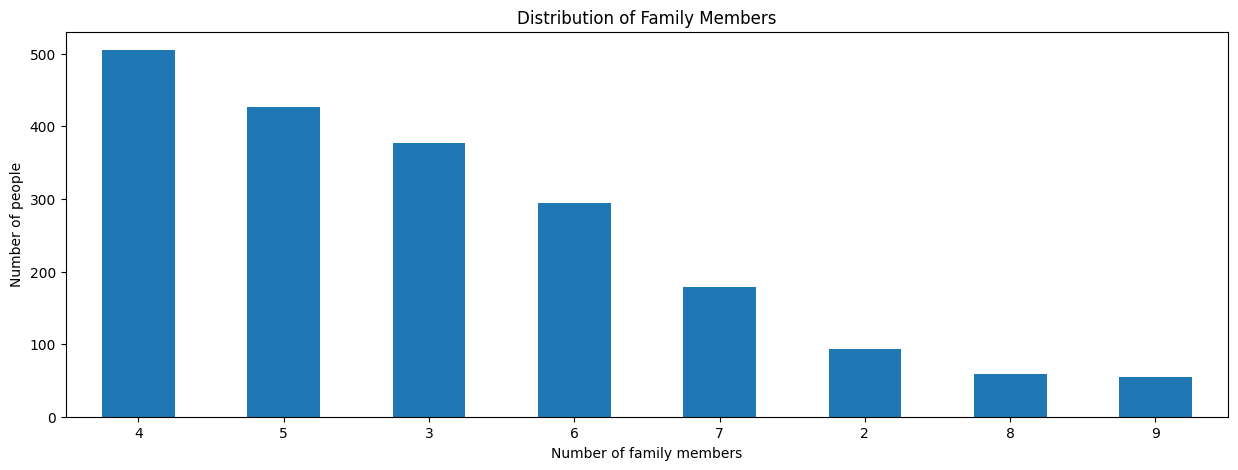

In [16]:
df['FamilyMembers'].value_counts().plot(kind='bar', figsize=(15, 5))
plt.title('Distribution of Family Members')
plt.ylabel('Number of people')
plt.xlabel('Number of family members')
plt.xticks(rotation=0)  
plt.show()

There more people in this dataset with families of 4, and it is interesting to see there are no families with only one member.

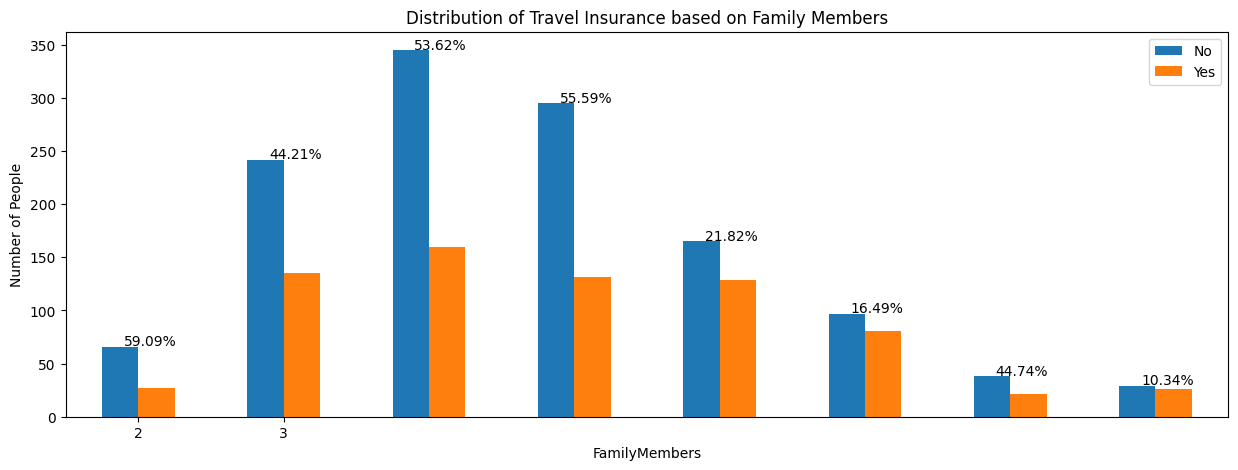

In [17]:
bar_plot_with_percenatge_diff('FamilyMembers', 'Family Members')

From the above diagram we can see that as family members increase there is no significant increase in the percentage difference.

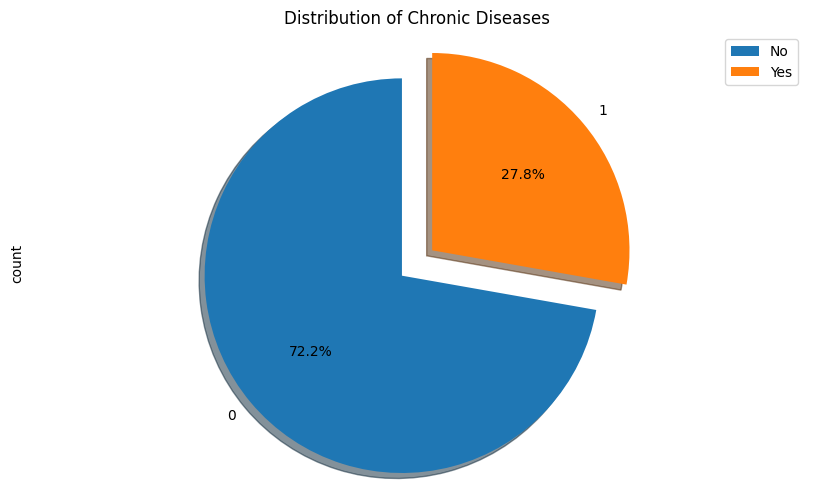

In [18]:
pie_plot('ChronicDiseases', 'Chronic Diseases', ['No', 'Yes'])

Most people in this dataset don't have chronic diseases.

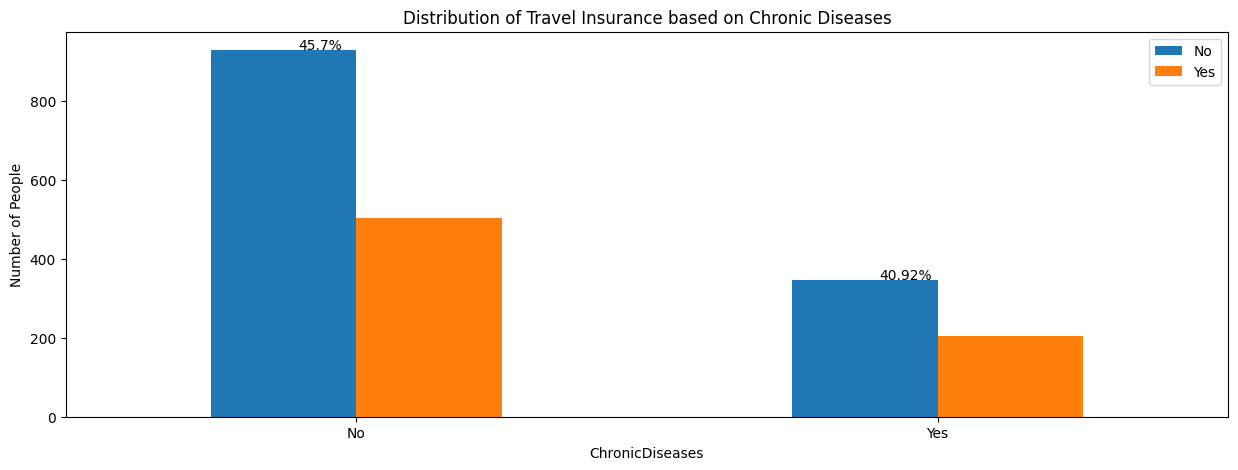

In [19]:
bar_plot_with_percenatge_diff('ChronicDiseases', 'Chronic Diseases', ['No', 'Yes'])

From the diagram if we look at the percentage difference we can see that people who have Chronic diseases tend to say yes more that that of those who don't have chronic diseases.

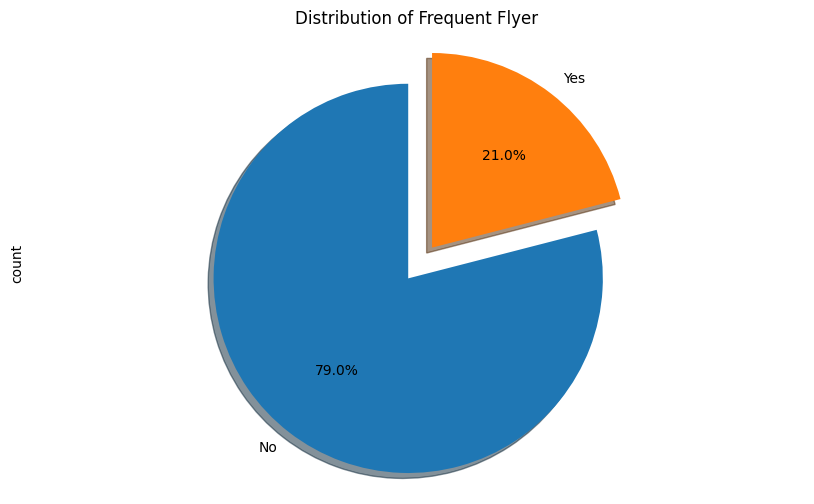

In [20]:
pie_plot('FrequentFlyer', 'Frequent Flyer')

Most people in this dataset aren't frequent flyers. A person is sayed to be a frequent flyer if they have flown 4 times in the past 2 years according to the original source of the dataset.

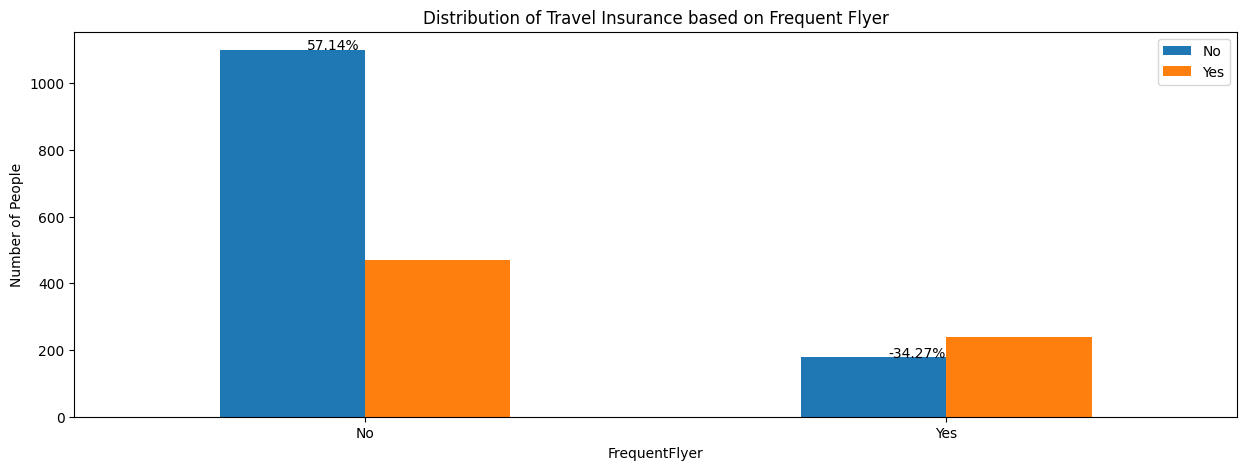

In [21]:
bar_plot_with_percenatge_diff('FrequentFlyer', 'Frequent Flyer', ['No', 'Yes'])

Here we can see that Frequent flyers tend to say yes to insurance purchase, which is reasonable.

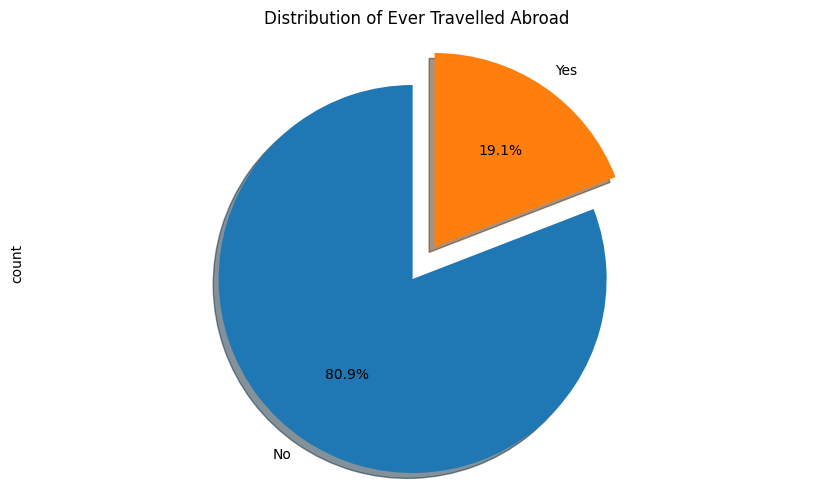

In [22]:
pie_plot('EverTravelledAbroad', 'Ever Travelled Abroad')

Most people in this dataset have never travelled abroad.

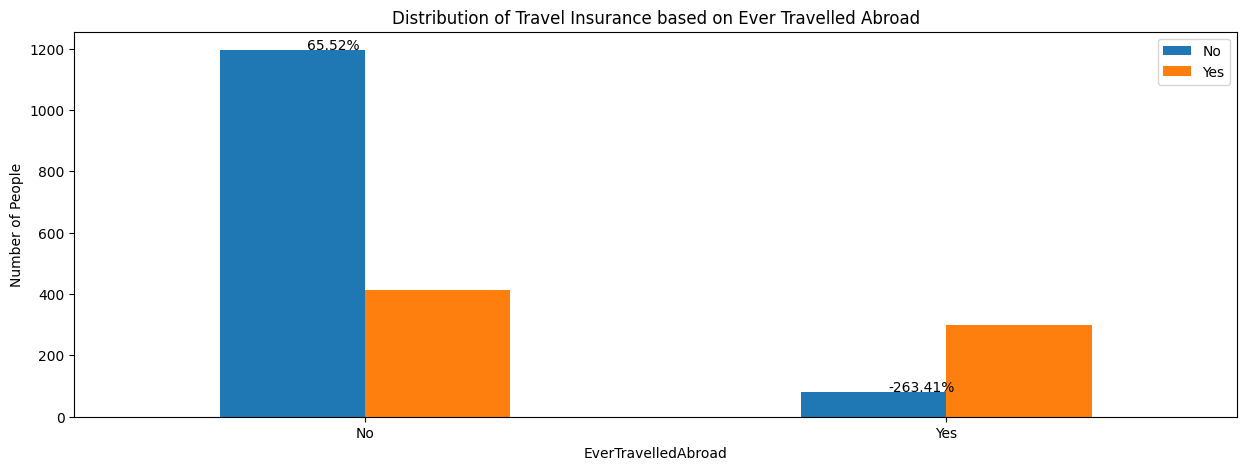

In [23]:
bar_plot_with_percenatge_diff('EverTravelledAbroad', 'Ever Travelled Abroad', ['No', 'Yes'])

From the above diagram we can understand that people who have flown even once abroad have more tendency to buy a travel insurance.

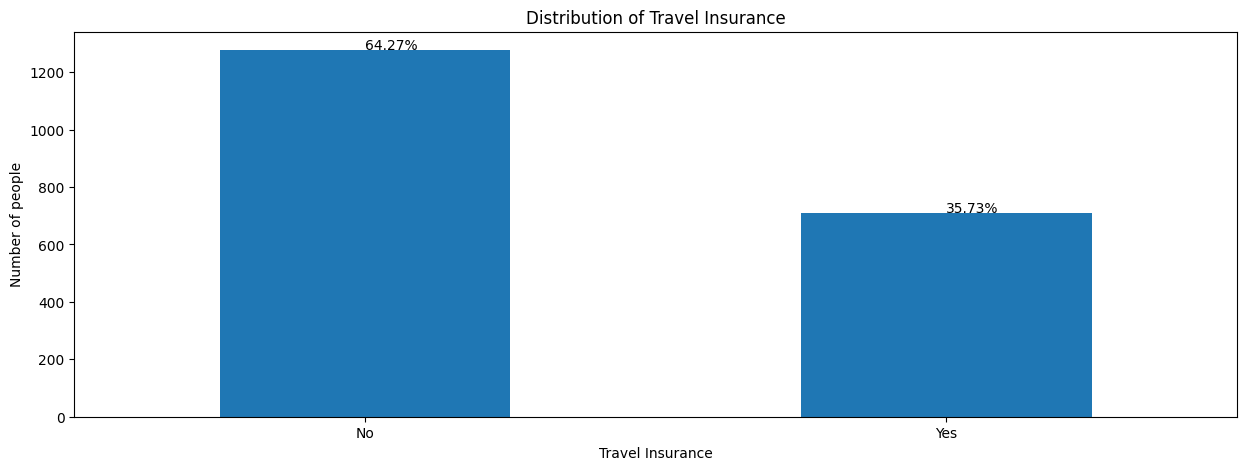

In [24]:
df['TravelInsurance'].value_counts().plot(kind='bar', figsize=(15, 5))
plt.title('Distribution of Travel Insurance')
for index, value in enumerate(df['TravelInsurance'].value_counts()):
    plt.text(index, value+1, str(round(value/df.shape[0]*100, 2))+'%')
plt.ylabel('Number of people')
plt.xlabel('Travel Insurance')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.show()

There are more people who sayed no to purchasing a travel insurance. Which indicates there is imbalance in the outcome we are getting which might affect our predictive modelling.

- Let's try to convert the categrical columns to numeric ones.

In [25]:
df['Employment Type'] = df['Employment Type'].replace(['Government Sector', 'Private Sector/Self Employed'], [0, 1])
df['GraduateOrNot'] = df['GraduateOrNot'].replace(['Yes', 'No'], [1, 0])
df['FrequentFlyer'] = df['FrequentFlyer'].replace(['No', 'Yes'], [0, 1])
df['EverTravelledAbroad'] = df['EverTravelledAbroad'].replace(['No', 'Yes'], [0, 1])
df

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1982,33,1,1,1500000,4,0,1,1,1
1983,28,1,1,1750000,5,1,0,1,0
1984,28,1,1,1150000,6,1,0,0,0
1985,34,1,1,1000000,6,0,1,1,1


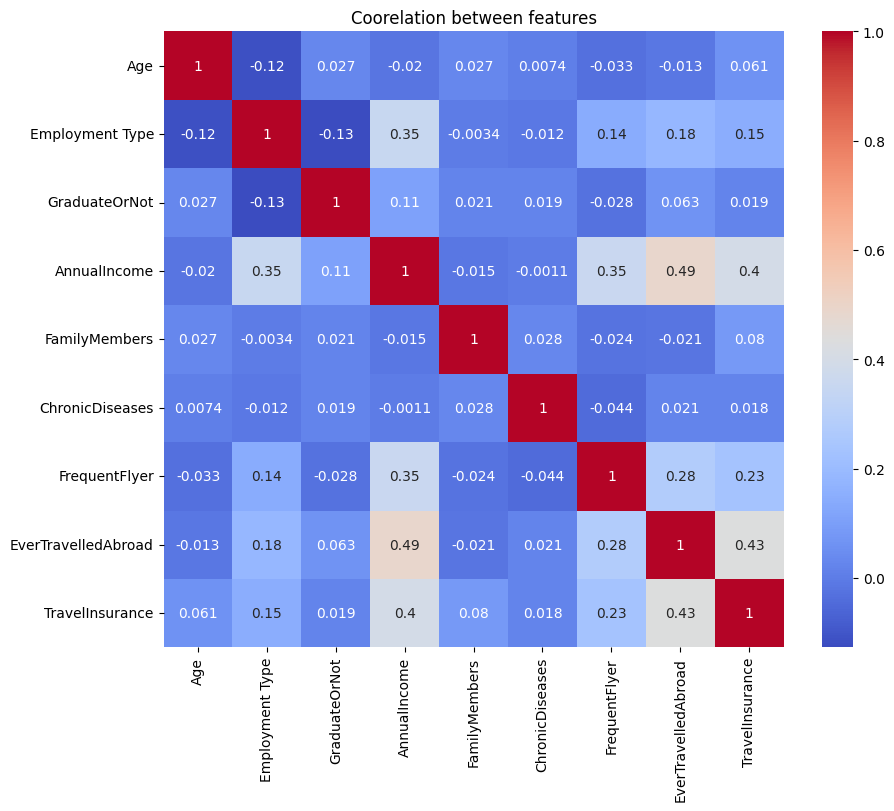

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Coorelation between features")
plt.show()

From the above diagram we can observe there are no strongly coorelated features. Even though there are no strongly coorelated features, here are some features that have shown closer to strong positive coorelations.
- Annual Income <> Employment Type
- Annual Income <> Frequent Flyer
- Annual Income <> Ever Travelled Abroad
- Annual Income <> Travel Insurabce

Annual Income looks like it is the most important feature amongst all, but let's wait and see if that is true in the modelling part.

## Hypothesis Testing

### Helper Functions

In [27]:
def t_and_z_test(population1, population2):
    '''
    This function takes in two populations and returns the t-test and z-test results.

    Parameters:
    population1: the first population
    population2: the second population

    Returns:
    t_test, z_test (tuple): the t-test and z-test result
    '''
    t_test = ttest_ind(population1, population2)
    z_test = ztest(population1, population2)
    return t_test, z_test

def reject_null(p_value, alpha):
    '''
    This function takes in a p_value and alpha and returns whether to reject the null hypothesis.

    Parameters:
    p_value (float): the p_value
    alpha (float): the alpha

    Returns:
    reject (boolean): whether to reject the null hypothesis
    '''
    if p_value < alpha:
        reject = True
    else:
        reject = False
    return reject

def confidence_interval(data, confidence=0.95):
    '''
    This function takes in a data and confidence level and returns the confidence interval.

    Parameters:
    data (array): the data
    confidence (float): the confidence level

    Returns:
    confidence_interval (tuple): the confidence interval
    '''
    data = np.array(data)
    mean = np.mean(data)
    n = len(data)
    stderr = np.std(data, ddof=1)/np.sqrt(n)
    margin_of_error = stderr * t.ppf((1 + confidence) / 2.0, n - 1)
    confidence_interval = (mean - margin_of_error, mean + margin_of_error)
    return confidence_interval

### Testing

- **Null Hypothesis**: The type of employment does not have an impact on the likelihood of purchasing travel insurance.
- **Alternative Hypothesis**: The type of employment has an impact on the likelihood of purchasing travel insurance.

In [28]:
population1 = df.loc[df['Employment Type'] == 0, 'TravelInsurance'].values
population2 = df.loc[df['Employment Type'] == 1, 'TravelInsurance'].values

t_test, z_test = t_and_z_test(population1, population2)

print('t-test result: p-value =', t_test[1])
print('z-test result: p-value =', z_test[1])

t-test result: p-value = 3.527704137446791e-11
z-test result: p-value = 2.7332983394129746e-11


In [29]:
result1 = reject_null(t_test[1], 0.05)
result2 = reject_null(z_test[1], 0.05)

if result1 == True and result2 == True:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

We reject the null hypothesis.


So that means employment type has an impact on the likelihood of purchasing travel insurance.

In [30]:
print(confidence_interval(population1))
print(confidence_interval(population2))

(0.210170247982266, 0.2810578221931726)
(0.37669615708833787, 0.42782042724476027)


- **Null Hypothesis**: There is no significant difference in travel insurance uptake between graduates and non-graduates.
- **Alternative Hypothesis**: There is a significant difference in travel insurance uptake between graduates and non-graduates.

In [31]:
population1 = df.loc[df['GraduateOrNot'] == 0, 'TravelInsurance'].values
population2 = df.loc[df['GraduateOrNot'] == 1, 'TravelInsurance'].values

t_test, z_test = t_and_z_test(population1, population2)

print('t-test result: p-value =', t_test[1])
print('z-test result: p-value =', z_test[1])

t-test result: p-value = 0.39893720574377023
z-test result: p-value = 0.3988355458124906


In [32]:
result1 = reject_null(t_test[1], 0.05)  
result2 = reject_null(z_test[1], 0.05)

if result1 == True and result2 == True:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

We fail to reject the null hypothesis.


What this means is there is no significant difference in travel insurance uptake between graduates and non-graduates.

In [33]:
print(confidence_interval(population1))
print(confidence_interval(population2))

(0.2813944364655331, 0.389792004212433)
(0.33820136151075175, 0.38402086071147046)


- **Null Hypothesis**: Higher income people and lower income people have the same chance of buying travel insurance.
- **Alternative Hypothesis**: Higher income people and lower income people have different chance of buying travel insurance.

In [34]:
population1 = df.loc[df['AnnualIncome'] >= 1000000, 'TravelInsurance'].values # higher income people
population2 = df.loc[df['AnnualIncome'] < 1000000, 'TravelInsurance'].values # lower income people

t_test, z_test = t_and_z_test(population1, population2)

print('t-test result: p-value =', t_test[1])
print('z-test result: p-value =', z_test[1])

t-test result: p-value = 6.041043179949597e-40
z-test result: p-value = 1.0866065907344314e-41


In [35]:
result1 = reject_null(t_test[1], 0.05)
result2 = reject_null(z_test[1], 0.05)

if result1 == True and result2 == True:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

We reject the null hypothesis.


So this means that higher income people and lower income people have different chance of buying travel insurance.

In [36]:
print(confidence_interval(population1))
print(confidence_interval(population2))

(0.47079387795188, 0.5344637456022735)
(0.19851103539191076, 0.2493654124845371)


- **Null Hypothesis**: The number of family members does not influence the likelihood of purchasing travel insurance.
- **Alternative Hypothesis**: Families of more than 3 members are more likely to purchase travel insurance.

In [37]:
population1 = df.loc[df['FamilyMembers'] <= 3, 'TravelInsurance'].values # families of 3 or less members
population2 = df.loc[df['FamilyMembers'] > 3, 'TravelInsurance'].values # families of more than 3 members

t_test, z_test = t_and_z_test(population1, population2)

print('t-test result: p-value =', t_test[1])
print('z-test result: p-value =', z_test[1])

t-test result: p-value = 0.513007348111868
z-test result: p-value = 0.5129315532287024


In [38]:
result1 = reject_null(t_test[1], 0.05)
result2 = reject_null(z_test[1], 0.05)

if result1 == True and result2 == True:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

We fail to reject the null hypothesis.


So at least from this dataset we can say the number of family members does not influence the likelihood of purchasing travel insurance.

In [39]:
print(confidence_interval(population1))
print(confidence_interval(population2))

(0.30155686729415476, 0.3878048348335048)
(0.3370394784696319, 0.38543909766748086)


- **Null Hypothesis**: There is no significant association between the presence of chronic diseases and travel insurance purchase.
- **Alternative Hypothesis**: There is a significant association between the presence of chronic diseases and travel insurance purchase.

In [40]:
population1 = df.loc[df['ChronicDiseases'] == 0, 'TravelInsurance'].values 
population2 = df.loc[df['ChronicDiseases'] == 1, 'TravelInsurance'].values

t_test, z_test = t_and_z_test(population1, population2)

print('t-test result: p-value =', t_test[1])
print('z-test result: p-value =', z_test[1])

t-test result: p-value = 0.4177258933785054
z-test result: p-value = 0.41762872960874886


In [41]:
result1 = reject_null(t_test[1], 0.05)
result2 = reject_null(z_test[1], 0.05)

if result1 == True and result2 == True:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

We fail to reject the null hypothesis.


Our tests tell us that there is no significant association between the presence of chronic diseases and travel insurance purchase.

In [42]:
print(confidence_interval(population1))
print(confidence_interval(population2))

(0.3271777550072657, 0.3766549976059747)
(0.3309443767226665, 0.41180924646573924)


## Modelling

### Imports

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


### Train and Test Splits

In [44]:
X = df.drop(['TravelInsurance'], axis=1)
y = df['TravelInsurance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Bare Modelling

Here we will do simple modelling by using little to no hyperparameters.

**Logistic Regression**

In [45]:
model = LogisticRegression()
model.fit(X_train, y_train)
log_pred = model.predict(X_test)
log_acc = metrics.accuracy_score(y_test, log_pred)
print('Logistic Regression Accuracy:', log_acc)

Logistic Regression Accuracy: 0.6683417085427136


**kNN**

In [46]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
knn_pred = model.predict(X_test)
knn_acc = metrics.accuracy_score(y_test, knn_pred)
print('KNN Accuracy:', knn_acc)

KNN Accuracy: 0.8023450586264657


**Naive Bayes**

In [47]:
model = GaussianNB()
model.fit(X_train, y_train)
gnb_pred = model.predict(X_test)
gnb_acc = metrics.accuracy_score(y_test, gnb_pred)
print('Naive Bayes Accuracy:', gnb_acc)

Naive Bayes Accuracy: 0.7755443886097152


**RBF SVM**

In [48]:
model = svm.SVC(kernel='rbf')
model.fit(X_train, y_train)
svm_pred = model.predict(X_test)
svm_acc = metrics.accuracy_score(y_test, svm_pred)
print('SVM Accuracy:', svm_acc)

SVM Accuracy: 0.8023450586264657


**Decision Tree**

In [49]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
dt_pred = model.predict(X_test)
dt_acc = metrics.accuracy_score(y_test, dt_pred)
print('Decision Tree Accuracy:', dt_acc)

Decision Tree Accuracy: 0.7604690117252931


**Random Forest**

In [50]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
rf_pred = model.predict(X_test)
rf_acc = metrics.accuracy_score(y_test, rf_pred)
print('Random Forest Accuracy:', rf_acc)

Random Forest Accuracy: 0.7922948073701842


Amongst the models we used kNN and SVM(rbf kernel) had the highest accuracy. 

### Cross Validation

Now let us use cross validation to evaluate the models we created.

Here we will be using k-Fold cross validation.

In [51]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
mean = []
accuracy = []
std = []
classifiers = ['Logistic Regression', 'KNN', 'Naive Bayes', 'SVM(rbf kernel)', 'Decision Tree', 'Random Forest']
models = [LogisticRegression(), 
          KNeighborsClassifier(n_neighbors=5), 
          GaussianNB(), svm.SVC(kernel='rbf'), 
          DecisionTreeClassifier(), 
          RandomForestClassifier(n_estimators=100)]
for model in models:
    cv_result = cross_val_score(model, X, y, cv=k_fold, scoring='accuracy')
    cv_result = cv_result
    mean.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

models_df = pd.DataFrame({'CV Mean': mean, 'Std': std}, index=classifiers)
models_df

,CV Mean,Std
Logistic Regression,0.642668,0.033695
KNN,0.814801,0.025681
Naive Bayes,0.753858,0.029068
SVM(rbf kernel),0.786079,0.029426
Decision Tree,0.785615,0.033110
Random Forest,0.795186,0.030081


- The mean of the cross-validation score represents the average performance of the model across all folds or iterations of the cross-validation process. 
- The standard deviation of the cross-validation score measures the variability or spread of the performance across different folds.
- A high mean score with a low standard deviation indicates a robust and reliable model.

Looking at the mean and standard deviation of our models still kNN seems to be the most performant of them all.

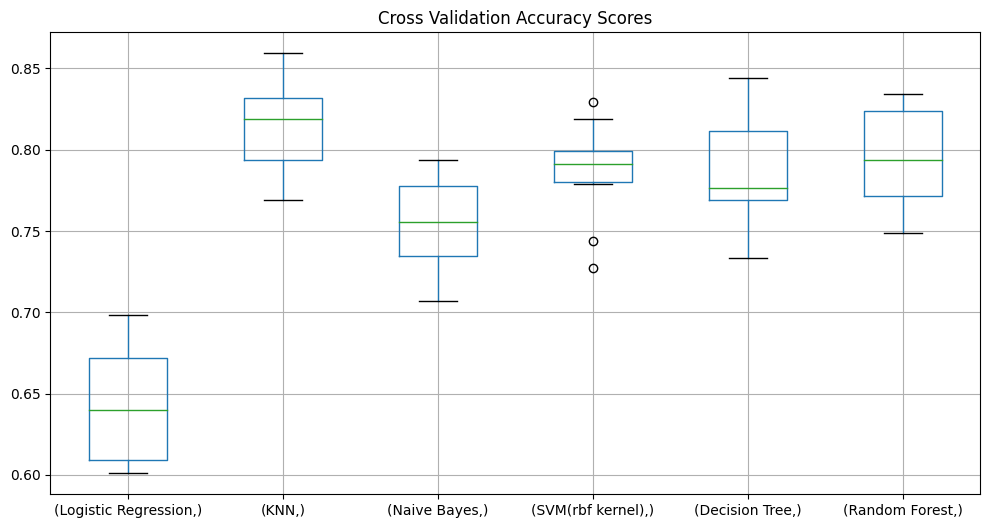

In [54]:
plt.subplots(figsize=(12, 6))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()
plt.title('Cross Validation Accuracy Scores')
plt.show()

### Confusion Matrix

In [56]:
def plot_confusion_matrix(y_test, y_pred, title, ax):
    sns.heatmap(confusion_matrix(y_test, y_pred), ax=ax, annot=True, fmt='2.0f')
    ax.set_title(title)

Plotting the confusion matrix

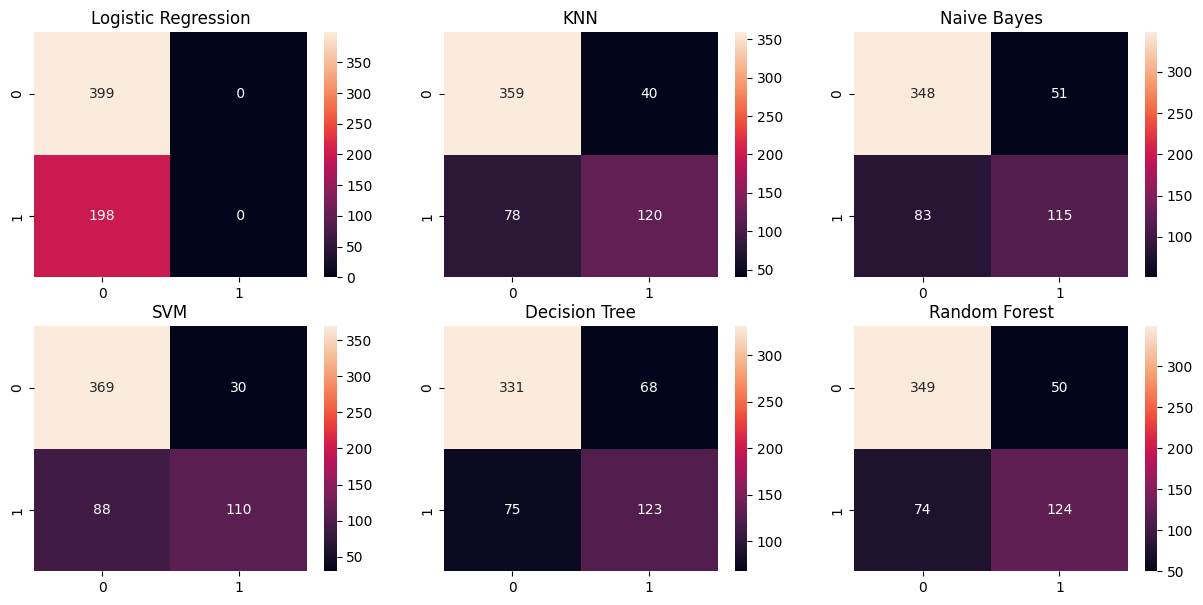

In [57]:
fig, ax = plt.subplots(2, 3, figsize=(15, 7))
plot_confusion_matrix(y_test, log_pred, 'Logistic Regression', ax[0, 0])
plot_confusion_matrix(y_test, knn_pred, 'KNN', ax[0, 1])
plot_confusion_matrix(y_test, gnb_pred, 'Naive Bayes', ax[0, 2])
plot_confusion_matrix(y_test, svm_pred, 'SVM', ax[1, 0])
plot_confusion_matrix(y_test, dt_pred, 'Decision Tree', ax[1, 1])
plot_confusion_matrix(y_test, rf_pred, 'Random Forest', ax[1, 2])

- the left diagonal elements are the number of correct predictions, and the right diagonal elements are the number of incorrect predictions.
- the top left element is the number of true negatives, and the bottom right element is the number of true positives.
- the top right element is the number of false positives, and the bottom left element is the number of false negatives.

- let's try to find the ratio of correct predictions to incorrect predictions for each model.

In [63]:
def correct_incorrect_pred(y_test, y_pred):
    '''
    This function returns the number of correct and incorrect predictions.
    
    Parameters:
    y_test: the actual values of the target variable
    y_pred: the predicted values of the target variable

    Returns:
    correct_pred: the number of correct predictions
    incorrect_pred: the number of incorrect predictions
    '''
    cm = confusion_matrix(y_test, y_pred)
    correct_pred = cm[0][0] + cm[1][1]
    incorrect_pred = cm[0][1] + cm[1][0]
    return correct_pred, incorrect_pred

In [64]:
log_correct, log_incorrect = correct_incorrect_pred(y_test, log_pred)
knn_correct, knn_incorrect = correct_incorrect_pred(y_test, knn_pred)
gnb_correct, gnb_incorrect = correct_incorrect_pred(y_test, gnb_pred)
svm_correct, svm_incorrect = correct_incorrect_pred(y_test, svm_pred)
dt_correct, dt_incorrect = correct_incorrect_pred(y_test, dt_pred)
rf_correct, rf_incorrect = correct_incorrect_pred(y_test, rf_pred)

correct_incorrect = pd.DataFrame({'Correct Prediction': [log_correct, knn_correct, gnb_correct, svm_correct, dt_correct, rf_correct],
                                    'Incorrect Prediction': [log_incorrect, knn_incorrect, gnb_incorrect, svm_incorrect, dt_incorrect, rf_incorrect]},
                                    index=classifiers)
correct_incorrect['Ratio'] = correct_incorrect['Incorrect Prediction'] / correct_incorrect['Correct Prediction']
correct_incorrect

,Correct Prediction,Incorrect Prediction,Ratio
Logistic Regression,399,198,0.496241
KNN,479,118,0.246347
Naive Bayes,463,134,0.289417
SVM(rbf kernel),479,118,0.246347
Decision Tree,454,143,0.314978
Random Forest,473,124,0.262156


Still kNN seems to be performant interms of most number of correct predictions.

### Hyper-parameter tuning

**We use grid search cross-validation to find the best hyperparameters for the classifiers, fit the model with the optimal hyperparameters, and evaluat its accuracy on the test data.**

**SVM**

In [65]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'sigmoid']}
svm_grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=0)
svm_grid.fit(X_train, y_train)
print(svm_grid.best_params_)
print(svm_grid.best_estimator_)
grid_pred = svm_grid.predict(X_test)
grid_acc = metrics.accuracy_score(y_test, grid_pred)
print('SVM Accuracy:', grid_acc)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1, gamma=0.1)
SVM Accuracy: 0.8274706867671692


By running the SVM in different hyper-parameters we get the above optimal hyper-parameter combination.
- By setting the C: which controls the trade-off between maximizing the margin (decision boundary separation) and minimizing the training error. By setting C to 1 we are creating a moderate tradeoff.
- The next parameter was the gamma: which determines the influence of a single training example. With a higher gamma value leading to closer influence and vice versa. Here, gamma is set to 0.1, indicating a moderate influence of individual training examples.

The outcome is better than what we initially had in the above SVM model.

**Random Forest**

In [66]:
param_grid = {'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [5, 10, 15, 20, 25]}
rand_grid = GridSearchCV(RandomForestClassifier(), param_grid, refit=True, verbose=0)
rand_grid.fit(X_train, y_train)
print(rand_grid.best_params_)
print(rand_grid.best_estimator_)
grid_pred = rand_grid.predict(X_test)
grid_acc = metrics.accuracy_score(y_test, grid_pred)
print('Random Forest Accuracy:', grid_acc)

{'max_depth': 5, 'n_estimators': 500}
RandomForestClassifier(max_depth=5, n_estimators=500)
Random Forest Accuracy: 0.8425460636515912


By running the Random Forest Classifier in different hyper-parameters we get the above optimal hyper-parameter combination.
- The max_depth determines the maximum depth or the maximum number of levels in each decision tree of the ensemble. Here by setting the depth of the tree to 5 we get good outcomes.
- The n_estimators specifies the number of decision trees to be included in the ensemble. Here by using 500 decision trees we managed to acheive a better performance.

The outcome is better than what we initially had in the above Random Forest model.

### Ensembling

#### Voting

In [68]:
estimators = [('Logistic Regression', LogisticRegression()),
                ('KNN', KNeighborsClassifier(n_neighbors=5)),
                ('Naive Bayes', GaussianNB()),
                ('SVM', svm.SVC(kernel='rbf', probability=True)),
                ('Decision Tree', DecisionTreeClassifier()),
                ('Random Forest', RandomForestClassifier(n_estimators=100))]
ensemble = VotingClassifier(estimators, voting='hard')
ensemble.fit(X_train, y_train)
ensemble_pred = ensemble.predict(X_test)
ensemble_acc = metrics.accuracy_score(y_test, ensemble_pred)
print('Ensemble Accuracy:', ensemble_acc)
cv_result = cross_val_score(ensemble, X, y, cv=k_fold, scoring='accuracy')
cv_result = cv_result
print('Cross Validation Mean:', cv_result.mean())

Ensemble Accuracy: 0.8207705192629816
Cross Validation Mean: 0.7961474036850921


Here I used hard voting the outcomes of all the classifiers and got a better result from all individual classifications.

#### Bagging

**Bagged Random Forest**

In [70]:
bag_clf = BaggingClassifier(RandomForestClassifier(n_estimators=500, max_depth=5), n_estimators=100, n_jobs=-1, random_state=0)
bag_clf.fit(X_train, y_train)
bag_pred = bag_clf.predict(X_test)
bag_acc = metrics.accuracy_score(y_test, bag_pred)
print('Bagging Accuracy:', bag_acc)

Bagging Accuracy: 0.8375209380234506


Here I run a bagging classifier based on the best hyper-paramters I got above. The results seem to be good. 

### Boosting

**Adaptive Boosting**

In [72]:
ada_clf = AdaBoostClassifier(n_estimators=200, algorithm='SAMME.R', learning_rate=0.5)
ada_clf.fit(X_train, y_train)
ada_pred = ada_clf.predict(X_test)
ada_acc = metrics.accuracy_score(y_test, ada_pred)
print('AdaBoost Accuracy:', ada_acc)
cross_val = cross_val_score(ada_clf, X, y, cv=k_fold, scoring='accuracy')
print('Cross Validation Mean:', cross_val.mean())

AdaBoost Accuracy: 0.8274706867671692
Cross Validation Mean: 0.8122354195218516


- In the adaptive boost we are using the parameter n_estimators=200: which specifies the number of estimators (decision trees) to be used in the AdaBoost ensemble. 
- The algorithm parameter determines the boosting algorithm to be used. In this case, 'SAMME.R(*Stagewise Additive Modeling using a Multi-class Exponential loss function with a Real-valued output*)' is selected. This algorithm is suitable for multi-class classification problems.
- The learning_rate parameter controls the contribution of each classifier (tree) in the ensemble during the boosting process. 

**Gradient Boosting**

In [73]:
gra_clf = GradientBoostingClassifier(max_depth=2, n_estimators=3, learning_rate=1.0)
gra_clf.fit(X_train, y_train)
gra_pred = gra_clf.predict(X_test)
gra_acc = metrics.accuracy_score(y_test, gra_pred)
print('Gradient Boosting Accuracy:', gra_acc)
cross_val = cross_val_score(gra_clf, X, y, cv=k_fold, scoring='accuracy')
print('Cross Validation Mean:', cross_val.mean())

Gradient Boosting Accuracy: 0.8391959798994975
Cross Validation Mean: 0.8318867062585655


- In the adaptive boost we are using the parameter n_estimators=3: which specifies the number of estimators (decision trees) to be used in the GradientBoost ensemble. 
- The max_deepth parameter indicate up to what depth we allow the tree to go.
- The learning_rate parameter controls the contribution of each classifier (tree) in the ensemble during the boosting process. 

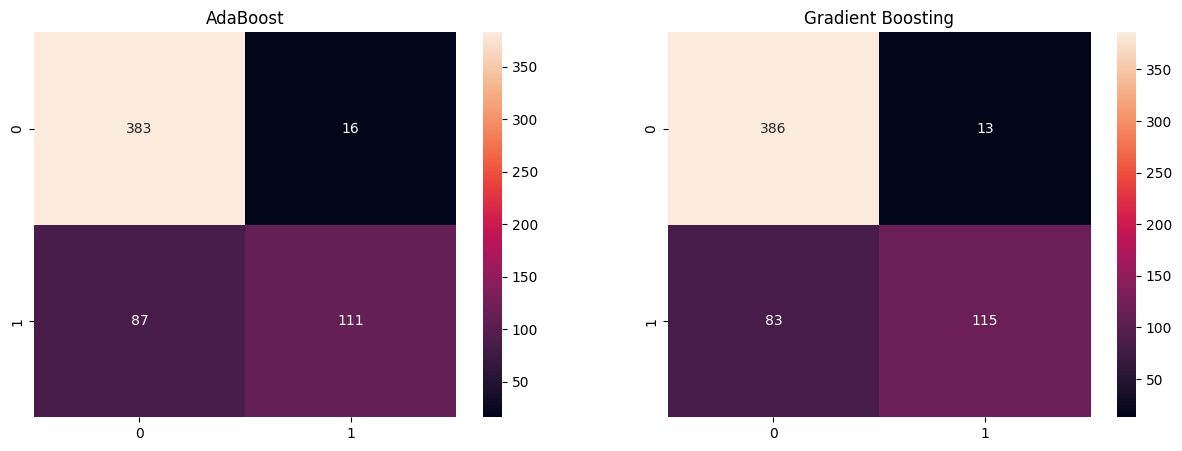

In [75]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plot_confusion_matrix(y_test, ada_pred, 'AdaBoost', ax[0])
plot_confusion_matrix(y_test, gra_pred, 'Gradient Boosting', ax[1])

In [76]:
ada_correct, ada_incorrect = correct_incorrect_pred(y_test, ada_pred)
gra_correct, gra_incorrect = correct_incorrect_pred(y_test, gra_pred)

correct_incorrect = pd.DataFrame({'Correct Prediction': [ada_correct, gra_correct],
                                    'Incorrect Prediction': [ada_incorrect, gra_incorrect]},
                                    index=['AdaBoost', 'Gradient Boosting'])
correct_incorrect['Ratio'] = correct_incorrect['Incorrect Prediction'] / correct_incorrect['Correct Prediction']
correct_incorrect

,Correct Prediction,Incorrect Prediction,Ratio
AdaBoost,494,103,0.208502
Gradient Boosting,501,96,0.191617


We get even more better ratios with the boosted models.

### Feature Importance

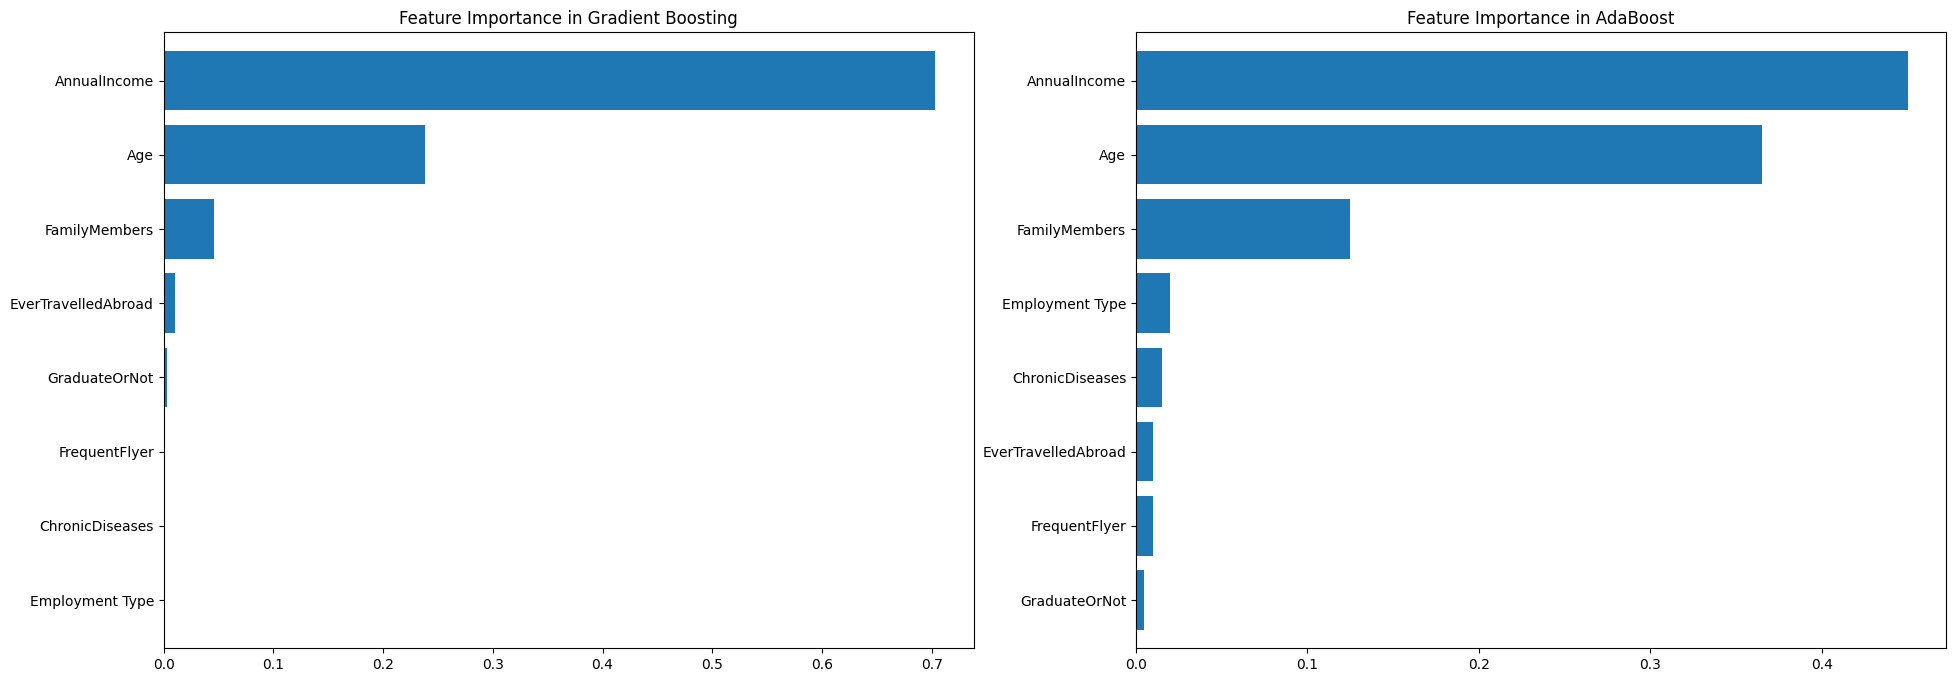

In [77]:
fig, ax = plt.subplots(1, 2, figsize=(23, 8))
pd.Series(gra_clf.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0])
ax[0].set_title('Feature Importance in Gradient Boosting')
pd.Series(ada_clf.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1])
ax[1].set_title('Feature Importance in AdaBoost')
plt.show()

The features Annual Income, Age, and Family Member are the most important features according to our two most performant models.

## Findings

1. While age alone does not appear to be a strong indicator of insurance purchasing behavior, it is interesting to note that individuals aged 28 constitute a significant majority in the dataset. Surprisingly, despite their large representation, most individuals in this age group do not purchase insurance.
2. The dataset shows a higher number of individuals employed in the private sector compared to the government sector. Interestingly, the percentage difference in insurance purchase between the two sectors is smaller for the private sector, suggesting that more individuals working in the private sector tend to buy insurance.
3. Graduated individuals tend to be more inclined towards purchasing insurance compared to those who haven't graduated. However, the difference in percentage between the two groups is not substantial, indicating that education level alone does not strongly influence insurance purchase behavior.
4. The majority of individuals in the dataset fall within an annual income range of 750,000 - 1,500,000 Rupees. Analysis of the plot reveals a higher proportion of "No" responses in lower income ranges, while higher income ranges exhibit a greater number of "Yes" responses. This suggests a correlation between higher income levels and a higher likelihood of purchasing insurance.
5. Families with four members are the most prevalent in the dataset, and interestingly, there are no single-member families represented. However, the plot does not show a significant increase in the percentage difference as family size increases, indicating that family size alone may not be a strong determinant of insurance purchasing behavior.
6. Most individuals in the dataset do not have chronic diseases. However, when analyzing the percentage difference, it becomes evident that individuals with chronic diseases are more likely to purchase insurance compared to those without such conditions.
7. The dataset indicates that the majority of individuals are not frequent flyers, defined as having flown four times in the past two years. However, among those who are frequent flyers, there is a higher tendency to purchase insurance, which aligns with expectations.
8. A significant portion of the dataset comprises individuals who have never traveled abroad. Interestingly, those who have traveled abroad, even once, exhibit a higher inclination towards buying travel insurance.
9. Although no strongly correlated features are observed, certain features show relatively strong positive correlations. Notably, annual income exhibits positive correlations with employment type, frequent flyer status, ever traveled abroad, and the purchase of travel insurance. This suggests that annual income could be the most influential feature in predicting insurance purchasing behavior.

## Recommendations and Summary

**Recommendation**:

Based on the insights gained from the analysis, the following recommendations can be made:
1. Target the Private Sector: Given that individuals working in the private sector show a smaller percentage difference in insurance purchase compared to the government sector, it would be advisable to focus marketing efforts on this group. Tailoring insurance offerings and promotional campaigns to the needs and preferences of private sector employees may result in a higher conversion rate.
2. Consider Income-based Segmentation: Since annual income appears to be a significant factor influencing insurance purchase, it would be beneficial to segment the target audience based on income levels. Designing differentiated insurance plans or pricing strategies that cater to various income brackets may increase the appeal of insurance products to different segments of the population.
3. Promote Insurance Benefits for Frequent Flyers: As frequent flyers exhibit a higher tendency to purchase insurance, highlighting the benefits of travel insurance, such as coverage for medical emergencies, trip cancellation, and lost baggage, would resonate well with this group. Collaborating with airlines or travel agencies to offer bundled insurance packages may also enhance the value proposition for frequent travelers.

In addition to these if the dataset was more balanced our predictive modelling could have a higher accuracy level.

**Summary**

In this notebook we have gone through te Travel Insurance dataset in-depth starting from looking in to what the dataset contains to performing exploratory data analysis, from hypothesis testing to predictive modelling. We have driven many insights from the data, validated our hypothesis, and most of all we used many different machine learning algorithms to predict wether a person will buy an insurance or not.